Github Link: https://github.com/Rutuja185233/TC6_/blob/main/TC6_Project_1_.ipynb


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pickle
import cv2
import os
import tensorflow
from tensorflow import keras
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import itertools
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import matplotlib.pyplot as plt

In [ ]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((256,256))
image_size = 0
directory_root = ('/content/drive/MyDrive/Kaggle/plantvillage')
width=256
height=256
depth=3

In [ ]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [ ]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        
        for disease_folder in plant_disease_folder_list :
            # remove .DS_Store from list
            if disease_folder == ".DS_Store" :
                plant_disease_folder_list.remove(disease_folder)

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
                
            for single_plant_disease_image in plant_disease_image_list :
                if single_plant_disease_image == ".DS_Store" :
                    plant_disease_image_list.remove(single_plant_disease_image)

            for image in plant_disease_image_list[:250]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")




[INFO] Loading images ...
[INFO] Processing Pepper__bell___Bacterial_spot ...
[INFO] Processing Pepper__bell___healthy ...
[INFO] Processing Potato___Early_blight ...
[INFO] Processing Potato___Late_blight ...
[INFO] Processing Potato___healthy ...
[INFO] Processing Tomato_Bacterial_spot ...
[INFO] Processing Tomato_Early_blight ...
[INFO] Processing Tomato_Late_blight ...
[INFO] Processing Tomato_Leaf_Mold ...
[INFO] Processing Tomato_Septoria_leaf_spot ...
[INFO] Processing Tomato_Spider_mites_Two_spotted_spider_mite ...
[INFO] Processing Tomato__Target_Spot ...
[INFO] Processing Tomato__Tomato_YellowLeaf__Curl_Virus ...
[INFO] Processing Tomato__Tomato_mosaic_virus ...
[INFO] Processing Tomato_healthy ...
[INFO] Image loading completed


In [ ]:
image_size = len(image_list)

In [ ]:
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
pickle.dump(label_binarizer,open('label_transform.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [ ]:
classes = (label_binarizer.classes_)
print(classes)

['Pepper__bell___Bacterial_spot' 'Pepper__bell___healthy'
 'Potato___Early_blight' 'Potato___Late_blight' 'Potato___healthy'
 'Tomato_Bacterial_spot' 'Tomato_Early_blight' 'Tomato_Late_blight'
 'Tomato_Leaf_Mold' 'Tomato_Septoria_leaf_spot'
 'Tomato_Spider_mites_Two_spotted_spider_mite' 'Tomato__Target_Spot'
 'Tomato__Tomato_YellowLeaf__Curl_Virus' 'Tomato__Tomato_mosaic_virus'
 'Tomato_healthy']


In [ ]:
np_image_list = np.array(image_list, dtype=np.float16) / 225.0

In [ ]:
#len(np_image_list)

In [ ]:
print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, test_size=0.2, random_state = 42) 

[INFO] Spliting data to train, test


In [ ]:
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2, 
    zoom_range=0.2,horizontal_flip=True, 
    fill_mode="nearest")

In [ ]:
model = Sequential()
inputShape = (height, width, depth)
chanDim = -1
if K.image_data_format() == "channels_first":
    inputShape = (depth, height, width)
    chanDim = 1
model.add(Conv2D(32, (3, 3), padding="same",input_shape=inputShape))
model.add(Activation("relu"))

model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(n_classes))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 activation (Activation)     (None, 256, 256, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 85, 85, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 85, 85, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 85, 85, 64)        1

In [ ]:
#Compiling Model
opt = Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)
# distribution
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])
# train the network
print("[INFO] training network...")

[INFO] training network...


In [ ]:
#Fitting Model
history = model.fit_generator(
    aug.flow(x_train, y_train, batch_size=BS),
    validation_data=(x_test, y_test),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS, verbose=1
    )

<ipython-input-21-8673887158ef>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/25
91/91 [==============================] - 270s 3s/step - loss: 0.0812 - accuracy: 0.8055 - val_loss: 0.1829 - val_accuracy: 0.6580
Epoch 2/25
91/91 [==============================] - 262s 3s/step - loss: 0.0848 - accuracy: 0.7889 - val_loss: 0.3996 - val_accuracy: 0.4145
Epoch 3/25
91/91 [==============================] - 262s 3s/step - loss: 0.0761 - accuracy: 0.8359 - val_loss: 0.1133 - val_accuracy: 0.7141
Epoch 4/25
91/91 [==============================] - 264s 3s/step - loss: 0.0693 - accuracy: 0.8380 - val_loss: 0.3948 - val_accuracy: 0.4952
Epoch 5/25
91/91 [==============================] - 261s 3s/step - loss: 0.0644 - accuracy: 0.8605 - val_loss: 0.2405 - val_accuracy: 0.6539
Epoch 6/25
91/91 [==============================] - 261s 3s/step - loss: 0.0853 - accuracy: 0.7902 - val_loss: 0.2510 - val_accuracy: 0.5239
Epoch 7/25
91/91 [==============================] - 260s 3s/step - loss: 0.0688 - accuracy: 0.8432 - val_loss: 0.2520 - val_accuracy: 0.5964
Epoch 8/25
91

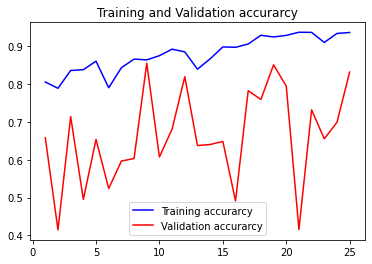

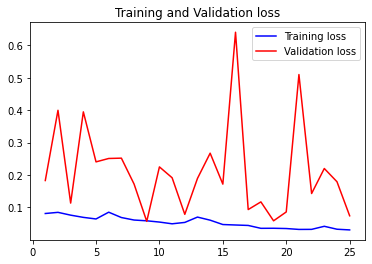

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()
plt.figure()

#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
model.save('my_model.h5')

In [ ]:
model.save('/content/drive/MyDrive/Colab Notebooks/my_model.h5')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/my_model.h5')

In [ ]:
#Train Accuracy
scores = model.evaluate(x_train, y_train)
print(f"Train Accuracy: {scores[1]*100}")

92/92 [==============================] - 65s 707ms/step - loss: 0.0572 - accuracy: 0.8730
Test Accuracy: 87.29887008666992


In [ ]:
#Test Accuracy
print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

[INFO] Calculating model accuracy
23/23 [==============================] - 17s 694ms/step - loss: 0.0742 - accuracy: 0.8317
Test Accuracy: 83.17373394966125


In [ ]:
y_pred = model.predict(x_test)

23/23 [==============================] - 23s 1s/step


In [ ]:
y_pred=np.argmax(y_pred, axis=1)
y_test=np.argmax(y_test, axis=1)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[51  3  0  0  0  0  0  0  0  2  0  0  4  0  1]
 [ 0 58  0  0  2  0  0  0  0  0  0  0  2  0  0]
 [ 0  0 46  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 41  2  0  0  0  0  0  1  0  0  0  0]
 [ 0  1  0  1 35  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 46  0  0  0  0  0  0  2  0  0]
 [ 0  0  1  1  2  3 41  1  0  0  0  0  1  0  1]
 [ 0  0  2  1  0  0  0 46  0  0  0  0  2  0  2]
 [ 0  1  2  0  0  0  0  1 32  0  1  0  5  0  0]
 [ 1  2  4  0  1  0  1  1  0 32  1  0  1  3  0]
 [ 0  0  0  0  4  0  0  0  0  0 38  0  2  0  2]
 [ 2  1  2  0 10  0  0  0  0  0  7 17  2  1  4]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  1  0  0  0  1  0  0 43  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 56]]


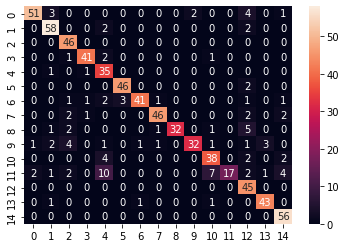

In [ ]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
f = sns.heatmap(cm, annot=True)

In [ ]:
#precision_score(y_test, y_pred, average = 'macro')*100

In [ ]:
print("Precision Score : ",(precision_score(y_test, y_pred, average='macro') * 100), "%")
print("Recall Score : ",(recall_score(y_test, y_pred, average='macro') * 100), "%")
print("F1 Score : ", (f1_score(y_test, y_pred, average = "macro")*100), "%")

Precision Score :  87.68640287216594 %
Recall Score :  85.54651026934137 %
F1 Score :  84.77222439418777 %


In [ ]:
from sklearn.metrics import classification_report
print('classification report: \n', classification_report(y_test, y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.94      0.84      0.89        61
           1       0.87      0.94      0.90        62
           2       0.79      1.00      0.88        46
           3       0.93      0.91      0.92        45
           4       0.62      0.95      0.75        37
           5       0.94      0.96      0.95        48
           6       0.95      0.80      0.87        51
           7       0.94      0.87      0.90        53
           8       1.00      0.76      0.86        42
           9       0.94      0.68      0.79        47
          10       0.78      0.83      0.80        46
          11       1.00      0.37      0.54        46
          12       0.68      1.00      0.81        45
          13       0.91      0.93      0.92        46
          14       0.85      1.00      0.92        56

    accuracy                           0.86       731
   macro avg       0.88      0.86      0.85       731
w

In [ ]:
import numpy as np
CATEGORIES = ['Pepper bell: Bacterial spot','Pepper bell: Healthy',
 'Potato: Early blight' ,'Potato: Late blight', 'Potato: Healthy',
 'Tomato: Bacterial spot' ,'Tomato_Early_blight', 'Tomato_Late_blight',
 'Tomato: Leaf Mold' ,'Tomato: Septoria leaf spot',
 'Tomato: Spider mites Two spotted spider mite' ,'Tomato: Target Spot',
 'Tomato: Yellow Leaf Curl Virus', 'Tomato: Mosaic virus',
 'Tomato: Healthy']

def image(path):
    img = cv2.imread(path)
    new_arr = cv2.resize(img,(256, 256))
    new_arr = np.array(new_arr/255)
    new_arr = new_arr.reshape(-1, 256, 256, 3)
    return new_arr

#model = keras.models.load_model('my_model.h5')

In [ ]:
prediction = model.predict(image('/content/drive/MyDrive/Kaggle/plantvillage/PlantVillage/Tomato_healthy/01700b46-3800-46c6-ab81-09a5f50af525___RS_HL 0108.JPG'))
print(CATEGORIES[prediction.argmax()])

1/1 [==============================] - 1s 680ms/step
Tomato: Healthy


In [ ]:
prediction = model.predict(image('/content/drive/MyDrive/Kaggle/plantvillage/PlantVillage/Potato___Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG'))
print(CATEGORIES[prediction.argmax()])

1/1 [==============================] - 0s 81ms/step
Potato: Late blight


In [ ]:
image_dir="/content/drive/MyDrive/Kaggle/plantvillage/PlantVillage/Potato___Late_blight/006cc01a-1888-4326-9b62-a65cb55a6377___RS_LB 5207.JPG"
im=convert_image_to_array(image_dir)
np_image_li = np.array(im, dtype=np.float16) / 225.0
npp_image = np.expand_dims(np_image_li, axis=0)

In [ ]:
result=model.predict(npp_image)
#print(result)
itemindex = np.where(result==np.max(result))
print("probability:"+str(np.max(result))+"\n"+CATEGORIES[prediction.argmax()])

1/1 [==============================] - 0s 76ms/step
probability:0.99998665
Potato: Late blight


In [ ]:
# from sklearn.metrics import classification_report
# print('classification report: \n', classification_report(y_test, y_pred))

classification report: 
               precision    recall  f1-score   support

           0       0.94      0.84      0.89        61
           1       0.87      0.94      0.90        62
           2       0.79      1.00      0.88        46
           3       0.93      0.91      0.92        45
           4       0.62      0.95      0.75        37
           5       0.94      0.96      0.95        48
           6       0.95      0.80      0.87        51
           7       0.94      0.87      0.90        53
           8       1.00      0.76      0.86        42
           9       0.94      0.68      0.79        47
          10       0.78      0.83      0.80        46
          11       1.00      0.37      0.54        46
          12       0.68      1.00      0.81        45
          13       0.91      0.93      0.92        46
          14       0.85      1.00      0.92        56

    accuracy                           0.86       731
   macro avg       0.88      0.86      0.85       731
w